In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("employee_data (1) 2 - employee_data (1) 2.csv")
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [4]:
df.shape

(14249, 10)

In [5]:
#statistics
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [6]:
#null check
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [7]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [8]:
#handling null for different columns
df['tenure'] = df['tenure'].fillna((df['tenure'].mean()))
df['last_evaluation'] = df['last_evaluation'].fillna((df['last_evaluation'].mean()))
df['satisfaction'] = df['satisfaction'].fillna((df['satisfaction'].mean()))
df['department'] = df['department'].fillna((df['department'].mode()))

In [9]:
#replacing the rest with 0
df = df.fillna(0)

In [10]:
#null check
df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

In [11]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [12]:
df['tenure'].dtype

dtype('float64')

In [13]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
1,232,support,0.0,0.718477,3,0.0,low,0.834544,Employed,2.0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0


<Axes: xlabel='tenure', ylabel='Count'>

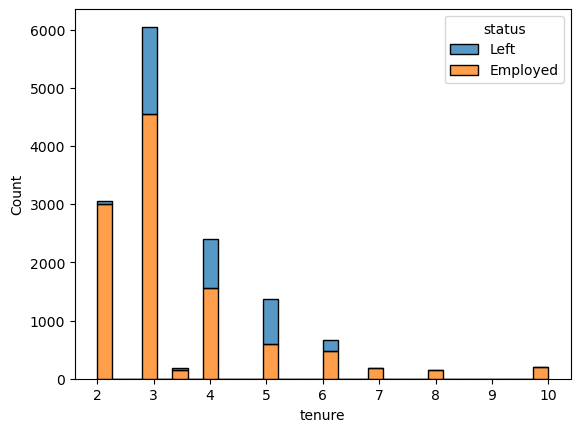

In [14]:
#visualizations
sns.histplot(data=df,x='tenure',hue='status',bins=30,multiple='stack')

<Axes: xlabel='satisfaction', ylabel='status'>

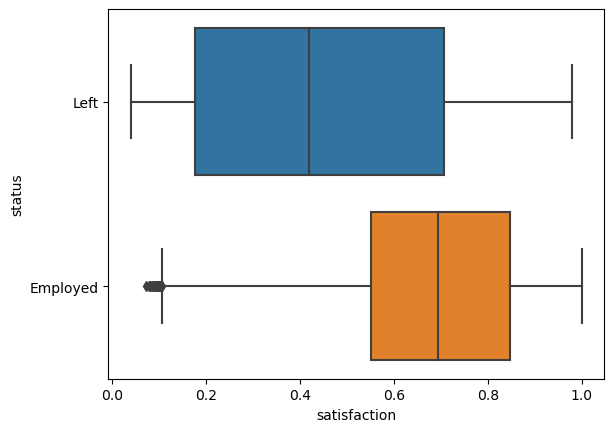

In [15]:
sns.boxplot(data=df,x='satisfaction',y='status')

In [16]:
df["status"].unique()

array(['Left', 'Employed'], dtype=object)

([<matplotlib.patches.Wedge at 0x20716b45f90>,
 [Text(-0.7480798945843441, -0.8064592186333274, 'Left'),
  Text(0.7480798568312627, 0.8064592536534736, 'Employed')],
 [Text(-0.40804357886418763, -0.43988684652726945, '76.2%'),
  Text(0.4080435582715978, 0.43988686562916735, '23.8%')])

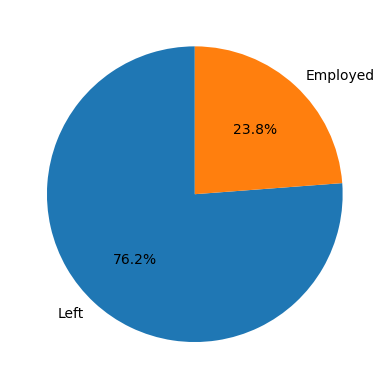

In [17]:
plt.pie(df["status"].value_counts(),labels=df["status"].unique(),autopct='%1.1f%%',startangle=90)

<Axes: xlabel='satisfaction', ylabel='last_evaluation'>

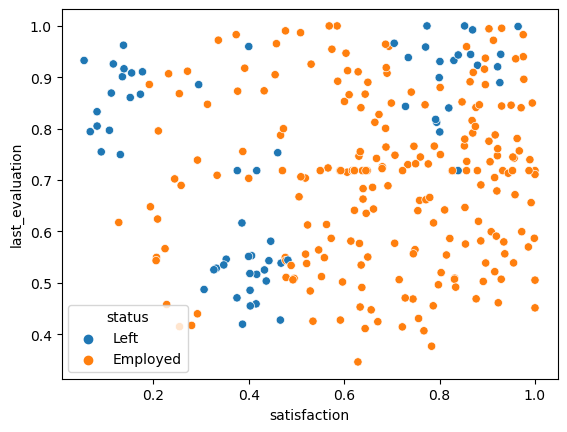

In [18]:
sns.scatterplot(data=df[::50],x='satisfaction',y='last_evaluation',hue='status')

In [19]:
df_left = df[df["status"]=='Left']
df_left

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
10,147,sales,0.0,0.718477,2,0.0,medium,0.403552,Left,3.0
13,290,engineering,0.0,0.770248,6,0.0,medium,0.090343,Left,4.0
15,258,support,0.0,0.837503,5,0.0,medium,0.849667,Left,5.0
17,252,IT,0.0,0.919196,5,0.0,low,0.893365,Left,5.0
...,...,...,...,...,...,...,...,...,...,...
14234,157,sales,0.0,0.534559,2,0.0,low,0.493401,Left,3.0
14236,242,marketing,0.0,0.985610,4,0.0,low,0.953847,Left,6.0
14239,242,finance,0.0,0.781112,6,0.0,low,0.669866,Left,5.0
14240,131,engineering,0.0,0.531197,2,0.0,low,0.341842,Left,3.0


In [20]:
df_left["last_evaluation"].corr(df_left["satisfaction"])

0.17796752212017497

since the value is very small it has a weak positive correlation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [22]:
df['department'] = df['department'].astype(str)

In [23]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

Index(['department', 'salary', 'status'], dtype='object')

In [24]:
categorical_cols = df.select_dtypes(include="object").columns
encoder = OrdinalEncoder()
encoded_cols = encoder.fit_transform(df[categorical_cols])
df[categorical_cols] = encoded_cols

In [25]:
x = df.drop(columns="status")

In [26]:
y = df["status"]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
x_test

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
5068,285,10.0,0.0,0.952897,2,0.0,0.0,0.844144,3.0
6146,260,3.0,0.0,0.836804,6,0.0,2.0,0.353128,3.0
13911,274,10.0,0.0,0.741130,2,0.0,0.0,0.208102,10.0
1180,263,5.0,0.0,0.723254,4,0.0,1.0,0.578015,5.0
8923,221,3.0,0.0,0.994083,2,0.0,2.0,0.943110,2.0
...,...,...,...,...,...,...,...,...,...
4053,224,10.0,0.0,0.604134,4,0.0,0.0,0.639600,3.0
10055,248,10.0,0.0,0.525023,4,0.0,1.0,0.802385,3.0
9255,140,1.0,0.0,0.603341,5,0.0,1.0,0.467671,2.0
13305,251,4.0,0.0,0.921769,5,0.0,2.0,0.186171,4.0


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [30]:
#default criterion is gini 
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
train_acc = accuracy_score(model.predict(x_train),y_train)
test_acc = accuracy_score(model.predict(x_test),y_test)

print(f'training accuracy is {train_acc} and testing accuracy is {test_acc}')
print(f"no of depths: {model.get_depth()}")
print(f"no of leaves: {model.get_n_leaves()}")

training accuracy is 0.9997368190192122 and testing accuracy is 0.9635087719298245
no of depths: 26
no of leaves: 439


In [31]:
#pruning
model1 = DecisionTreeClassifier(criterion="entropy")
model1.fit(x_train,y_train)
train_acc = accuracy_score(model1.predict(x_train),y_train)
test_acc = accuracy_score(model1.predict(x_test),y_test)

print(f'training accuracy is {train_acc} and testing accuracy is {test_acc}')
print(f"no of depths: {model.get_depth()}")
print(f"no of leaves: {model.get_n_leaves()}")

training accuracy is 0.9997368190192122 and testing accuracy is 0.9656140350877193
no of depths: 26
no of leaves: 439


In [32]:
from sklearn.model_selection import KFold,GridSearchCV
#defining the hyperparameter grid
para_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [None,5,15,20,25],
    'min_samples_leaf': [1,2,4,6]
}
#setting up cross validation
cv = KFold(n_splits=5,shuffle=True,random_state=1)
grid_search = GridSearchCV(estimator=model,param_grid=para_grid,cv=cv,scoring="accuracy")

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 6]},
             scoring='accuracy')

In [34]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6}
0.966663818387566


In [35]:
best_model = grid_search.best_estimator_
preds = best_model.predict(x_test)
print(classification_report(preds,y_test))
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2238
         1.0       0.91      0.95      0.93       612

    accuracy                           0.97      2850
   macro avg       0.95      0.96      0.95      2850
weighted avg       0.97      0.97      0.97      2850

0.9680701754385965
[[2180   33]
 [  58  579]]


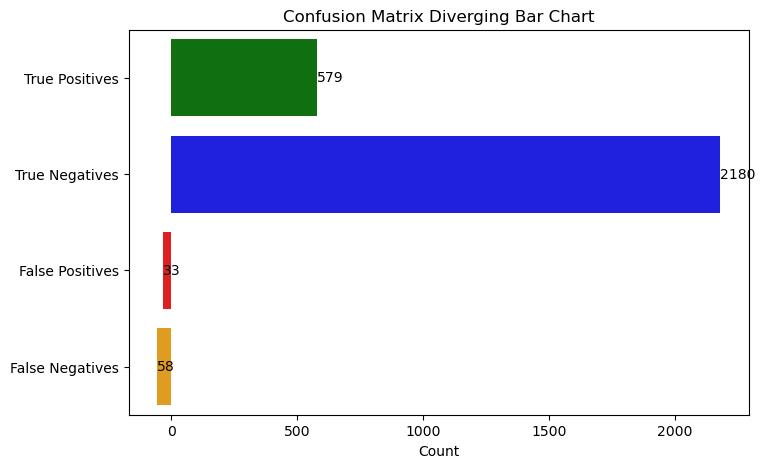

In [36]:
#Compute the Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

#Prepare Data for Plotting
labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [tp, tn, -fp, -fn]

#Create the Diverging Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x=values, y=labels, palette=['green', 'blue', 'red', 'orange'], ax=ax)

# Add labels for values
for i, v in enumerate(values):
    ax.text(v + np.sign(v)*0.2, i, f'{abs(v)}', color='black', va='center')

ax.set_title('Confusion Matrix Diverging Bar Chart')
ax.set_xlabel('Count')

plt.show()

In [37]:
gini_importance = model.feature_importances_
entropy_importance = model.feature_importances_
features = x.columns

feature_imp = pd.DataFrame({
    "Feature":features,
    "gini_importance": gini_importance,
    "entropy_importance": entropy_importance
})


In [38]:
feature_imp

,Feature,gini_importance,entropy_importance
0,avg_monthly_hrs,0.192219,0.192219
1,department,0.009332,0.009332
2,filed_complaint,0.001696,0.001696
3,last_evaluation,0.110378,0.110378
4,n_projects,0.121830,0.121830
5,recently_promoted,0.000027,0.000027
6,salary,0.004258,0.004258
7,satisfaction,0.412020,0.412020
8,tenure,0.148239,0.148239


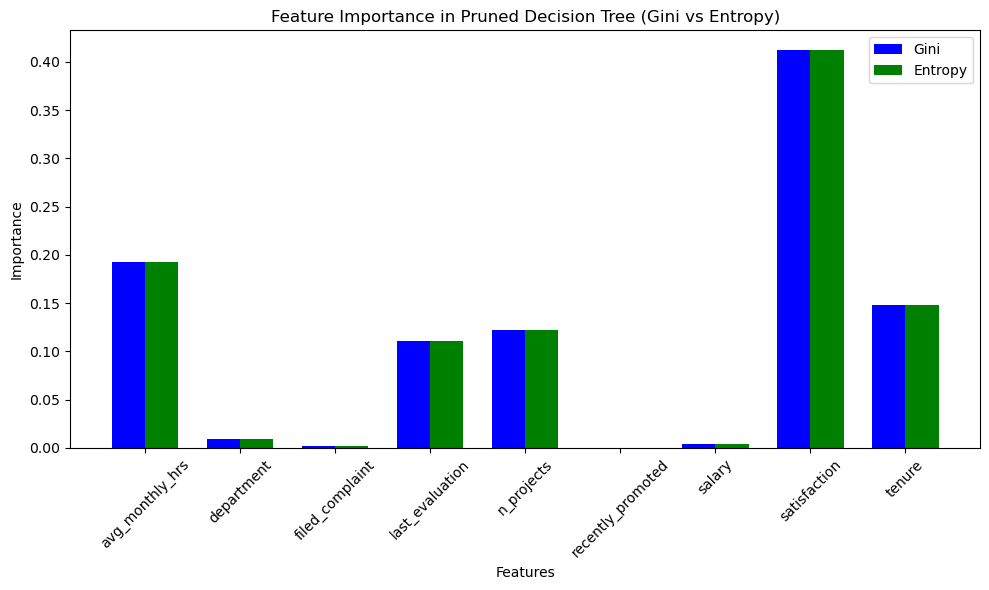

In [51]:
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(features))

# Gini bar chart
bar1 = plt.bar(index, feature_imp['gini_importance'], bar_width, label='Gini', color='b')

# Entropy bar chart
bar2 = plt.bar(index + bar_width, feature_imp['entropy_importance'], bar_width, label='Entropy', color='g')

# Adding Labels and Titles
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Pruned Decision Tree (Gini vs Entropy)')
plt.xticks(index + bar_width / 2, features, rotation=45)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()